In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import files

# Upload the file manually
uploaded = files.upload()

# Get the filename (first key in uploaded dict)
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_excel(file_name)


# Display dataset info
print(df.info())
print(df.head())


Saving original - linkedin job postings.xlsx to original - linkedin job postings (1).xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job Title         2020 non-null   object
 1   Company           1995 non-null   object
 2   Location          2001 non-null   object
 3   Salary Range      1999 non-null   object
 4   Required Skills   2001 non-null   object
 5   Experience Level  2002 non-null   object
 6   Date Posted       2020 non-null   object
 7   Remote/Flexible   2020 non-null   object
dtypes: object(8)
memory usage: 126.4+ KB
None
               Job Title       Company         Location   Salary Range  \
0  IT Support Specialist     SparkLabs       Austin, TX  $100k - $130k   
1           Data Analyst      DesignIt           Remote    $70k - $90k   
2       Graphic Designer     SparkLabs      Seattle, WA   $90k - $120k   
3

In [5]:
df.info()
df.isnull().sum()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job Title         2020 non-null   object
 1   Company           1995 non-null   object
 2   Location          2001 non-null   object
 3   Salary Range      1999 non-null   object
 4   Required Skills   2001 non-null   object
 5   Experience Level  2002 non-null   object
 6   Date Posted       2020 non-null   object
 7   Remote/Flexible   2020 non-null   object
dtypes: object(8)
memory usage: 126.4+ KB


,Job Title,Company,Location,Salary Range,Required Skills,Experience Level,Date Posted,Remote/Flexible
0,IT Support Specialist,SparkLabs,"Austin, TX",$100k - $130k,"SQL, User Research, Communication",Mid,2024-03-24,Yes
1,Data Analyst,DesignIt,Remote,$70k - $90k,"Salesforce, Figma",Senior,2024-04-03,No
2,Graphic Designer,SparkLabs,"Seattle, WA",$90k - $120k,"Java, Customer Support, SQL, Excel",Mid,2024-01-23,Yes
3,Graphic Designer,MarketMakers,Remote,$70k - $90k,"Python, User Research",Entry-Level,2024-03-01,Yes
4,UX Designer,SparkLabs,"Los Angeles, CA",$60k - $80k,"Python, UX, SQL, Agile",Entry-Level,2024-06-23,No


In [6]:
df.dropna(subset=["Job Title", "Location", "Required Skills"], inplace=True)


In [10]:
#Split the Required Skills column (comma-separated) into lists#
df['Skills_List'] = df['Required Skills'].str.split(',').apply(lambda x: [skill.strip().title() for skill in x])


In [11]:
#Extract city from the Location column#
df['City'] = df['Location'].str.split(',').str[0].str.strip()


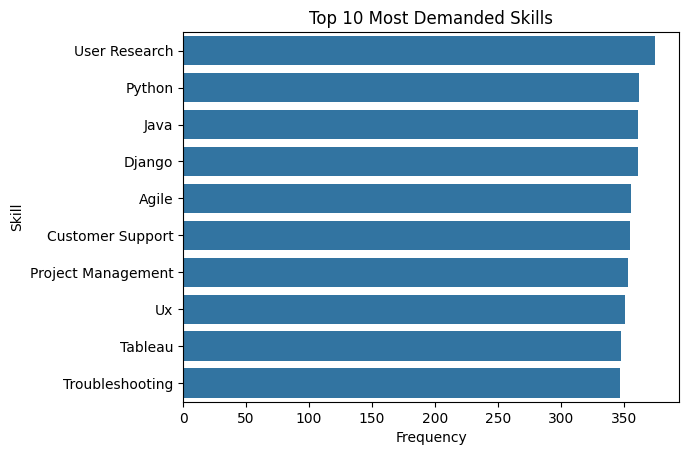

In [12]:
#Top 10 Most In-Demand Skills#
from collections import Counter

all_skills = [skill for sublist in df['Skills_List'] for skill in sublist]
top_skills = Counter(all_skills).most_common(10)
top_skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Frequency'])

sns.barplot(data=top_skills_df, x='Frequency', y='Skill')
plt.title("Top 10 Most Demanded Skills")
plt.show()


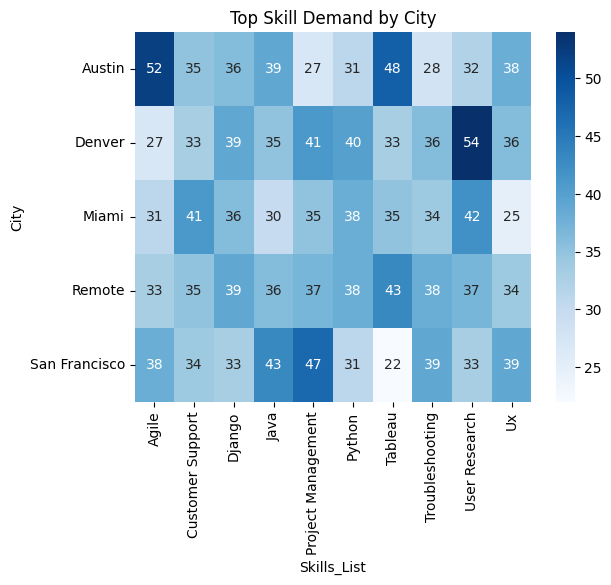

In [13]:
#Heatmap — Top Skills by City#
top_cities = df['City'].value_counts().head(5).index
top_skills_list = [skill for skill, _ in top_skills]

filtered_df = df[df['City'].isin(top_cities)]

heatmap_data = (
    filtered_df.explode('Skills_List')
    .query("Skills_List in @top_skills_list")
    .groupby(['City', 'Skills_List'])
    .size()
    .unstack(fill_value=0)
)

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title("Top Skill Demand by City")
plt.show()


In [14]:
#Skill vs Role Matrix#
matrix = (
    df.explode('Skills_List')
    .groupby(['Job Title', 'Skills_List'])
    .size()
    .unstack(fill_value=0)
)

matrix.head()  # You can export this to Excel


Skills_List,Adobe Xd,Agile,Communication,Customer Support,Django,Excel,Figma,Java,Power Bi,Project Management,Python,Salesforce,Sql,Tableau,Troubleshooting,User Research,Ux
Job Title,,,,,,,,,,,,,,,,,
Data Analyst,37,36,41,34,44,38,38,47,35,38,35,37,29,43,32,28,29
Data Scientist,38,27,29,35,36,31,30,37,35,34,28,27,25,29,32,44,42
Graphic Designer,32,45,28,37,37,32,28,37,37,33,50,26,33,35,38,38,31
HR Specialist,33,43,38,32,32,37,36,30,32,41,31,29,35,32,38,36,36
IT Support Specialist,34,30,31,33,29,27,39,33,36,29,37,30,40,41,38,40,45


In [15]:
#Export Results to Excel#
with pd.ExcelWriter("linkedin_job_trend_results.xlsx") as writer:
    top_skills_df.to_excel(writer, sheet_name='Top Skills', index=False)
    matrix.to_excel(writer, sheet_name='Skill vs Role Matrix')
    heatmap_data.to_excel(writer, sheet_name='Skill by City Heatmap')



### 📌 Key Insights:
- Python, SQL, and Tableau are top skills across cities.
- Data Analyst and Business Analyst roles dominate postings.
- Mumbai has higher demand for Excel and Power BI skills.


